# Rolling Staistics

In [80]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [48]:
filename = 'tr_eikon_eod_data.csv'
f = open(filename, 'r')
data1 = pd.read_csv(filename, index_col = 0, parse_dates = True)

In [49]:
sym = 'AAPL.O' #こういう列がcsvにあります。

In [50]:
data1 = pd.DataFrame(data[sym]).dropna() #全て欠損値の行・列削除

In [51]:
window = 20

In [52]:
data1['min'] = data[sym].rolling(window = window).min()

In [53]:
data1['mean'] = data[sym].rolling(window = window).mean()

In [54]:
data1['std'] = data[sym].rolling(window = window).std()

In [55]:
data1['median'] = data[sym].rolling(window = window).median()

In [56]:
data1['max'] = data[sym].rolling(window = window).max()

In [57]:
data1['ewma'] = data[sym].ewm(halflife = 0.5, min_periods = window).mean()

[移動平均について](https://bellcurve.jp/statistics/blog/15528.html)
[指数加重移動平均について](https://www.moneypartners.co.jp/support/tech/ema.html)

In [58]:
data.dropna().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


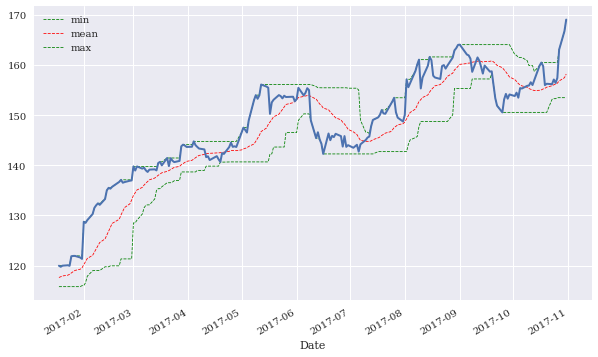

In [60]:
ax = data1[['min', 'mean', 'max']].iloc[-200:].plot(figsize = (10, 6), style = ['g--', 'r--', 'g--'], lw = 0.8)
data[sym].iloc[-200:].plot(ax = ax, lw = 2.0)

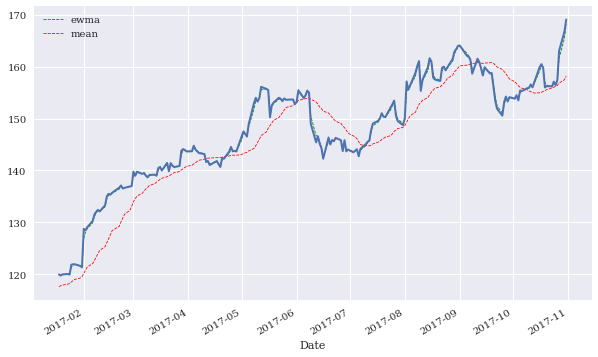

In [62]:
ax = data1[['ewma', 'mean']].iloc[-200:].plot(figsize = (10, 6), style = ['g--', 'r--'], lw = 0.8)
data1[sym].iloc[-200:].plot(ax = ax, lw = 2.0)

**Technical Analysis**

In [63]:
data['SMA1'] = data[sym].rolling(window = 42).mean()

In [64]:
data['SMA2'] = data[sym].rolling(window = 252).mean()

In [65]:
data[[sym, 'SMA1', 'SMA2']].tail()

,AAPL.O,SMA1,SMA2
Date,,,
2017-10-25,156.41,157.610952,139.862520
2017-10-26,157.41,157.514286,140.028472
2017-10-27,163.05,157.517619,140.221210
2017-10-30,166.72,157.597857,140.431528
2017-10-31,169.04,157.717857,140.651766


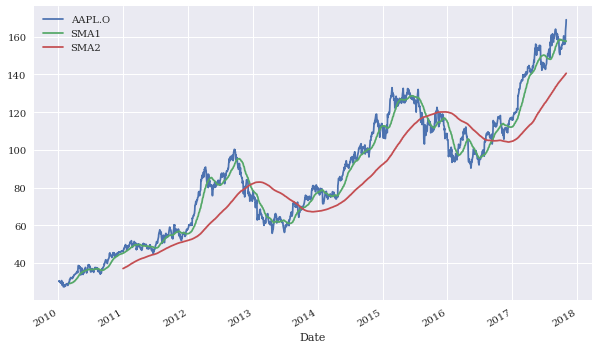

In [66]:
data[[sym, 'SMA1', 'SMA2']].plot(figsize = (10, 6))

In [67]:
data.dropna(inplace = True)

In [68]:
data['positions'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)

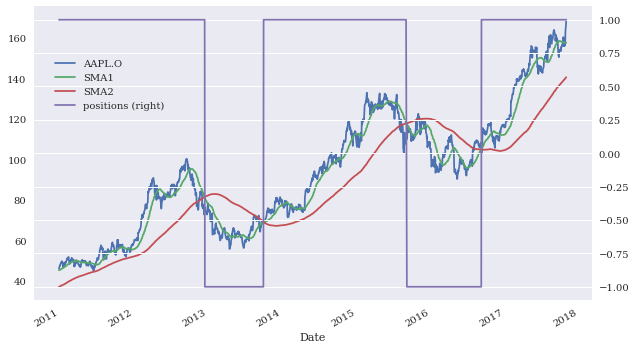

In [69]:
ax = data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize = (10,6), secondary_y = 'positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

# Correlation Analysis

In [70]:
raw = pd.read_csv('tr_eikon_eod_data.csv', index_col = 0, parse_dates = True)

In [71]:
datac = raw[['.SPX', '.VIX']].dropna()

[VIXについて](https://toushi-kyokasho.com/how-to-use-vix/)
簡単にいうとSPXのボラティリティーがVIX

In [72]:
datac.tail()

,.SPX,.VIX
Date,,
2017-10-25,2557.15,11.23
2017-10-26,2560.40,11.30
2017-10-27,2581.07,9.80
2017-10-30,2572.83,10.50
2017-10-31,2575.26,10.18


array([<matplotlib.axes._subplots.AxesSubplot object at 0x12471ce80>,
      dtype=object)

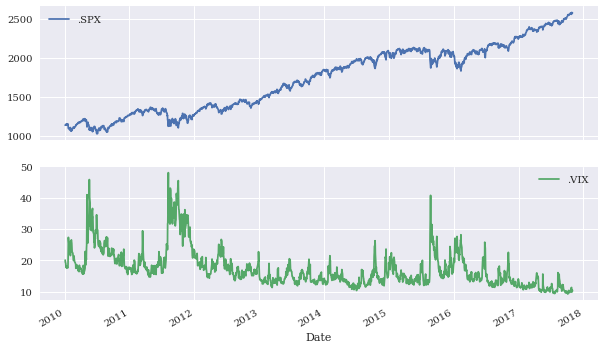

In [73]:
datac.plot(subplots = True, figsize = (10, 6))

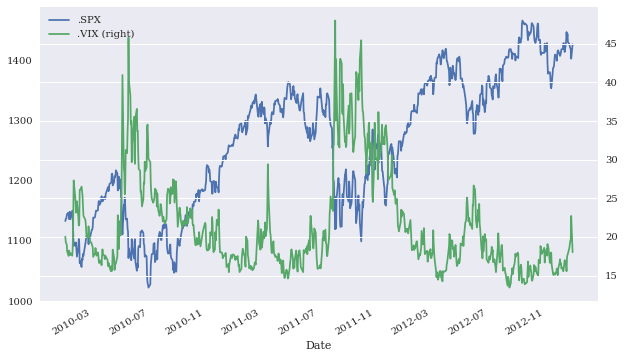

In [74]:
datac.loc[:'2012-12-31'].plot(secondary_y = '.VIX', figsize = (10, 6))

**Logarithmic Returns**  
[log returnsについて](http://www.ec.kansai-u.ac.jp/user/amatsuo/diversify.html)

[vlatility clusteringについて](https://www.k-zone.co.jp/study/learning/fund/selection/94.html)  
「金融商品のボラティリティーについては、一旦、跳ね上がると高い水準がしばらく続き、低下すると低水準状態が継続する傾向があるということが学術的に知られている。「ボラティリティー・クラスタリング（Volatility Clustering）」と呼ぶ現象だ（注２）。クラスタとは束のように集結した状態を意味する。ボラティリティーが急上昇すると、しばらくは乱高下のような荒い値動きが続き、ボラティリティーが低下すると比較的緩やかな変動で推移する――という見方だ。」

In [75]:
rets = np.log(datac / datac.shift(1))

In [76]:
rets.head()

,.SPX,.VIX
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.003111,-0.035038
2010-01-06,0.000545,-0.009868
2010-01-07,0.003993,-0.005233
2010-01-08,0.002878,-0.050024


In [28]:
rets.dropna(inplace = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x121c71e48>,
      dtype=object)

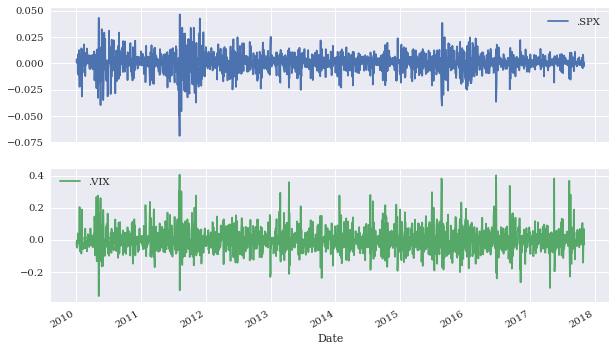

In [29]:
rets.plot(subplots = True, figsize = (10, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121ee96d8>,
      dtype=object)

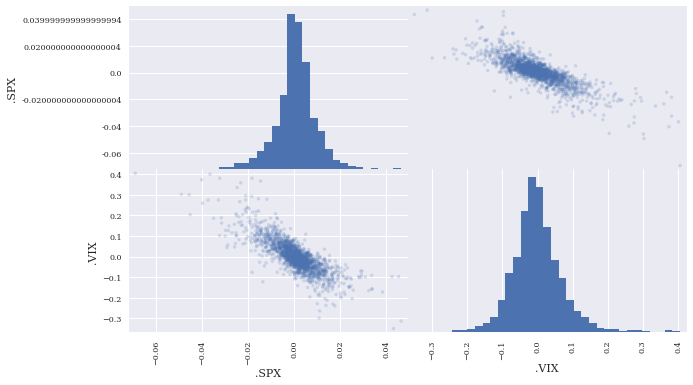

In [30]:
pd.plotting.scatter_matrix(rets, alpha = 0.2, diagonal = 'hist', hist_kwds = {'bins' : 35}, figsize = (10, 6))

**OLS Regression**  
最小二乗法

In [31]:
reg = np.polyfit(rets['.SPX'], rets['.VIX'], deg = 1)

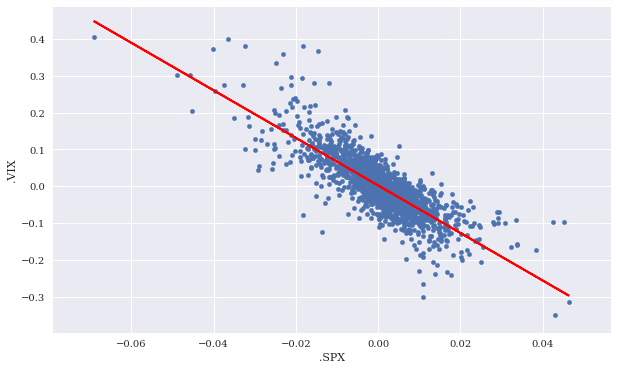

In [32]:
ax = rets.plot(kind = 'scatter', x = '.SPX', y = '.VIX', figsize = (10, 6))
ax.plot(rets['.SPX'], np.polyval(reg, rets['.SPX']), 'r', lw = 2)

**Correlation**  
相関

In [33]:
rets.corr()

,.SPX,.VIX
.SPX,1.000000,-0.808372
.VIX,-0.808372,1.000000


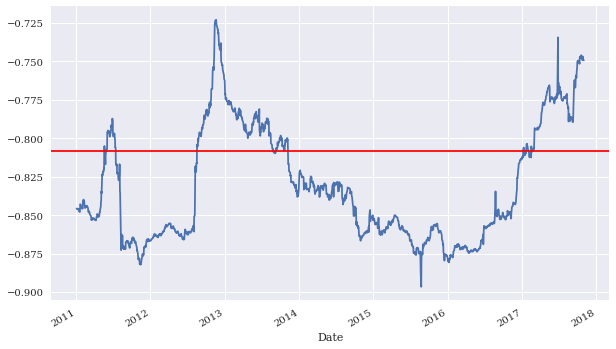

In [34]:
ax = rets['.SPX'].rolling(window = 252).corr(rets['.VIX']).plot(figsize = (10, 6))
ax.axhline(rets.corr().iloc[0, 1], c = 'r')

# High Frequency Data  

[tick dataについて](https://www.slideshare.net/NakataMaho/tickdata)  
「市場での為替取引に関して、個人の顧客まで、売値、買値が渡ってくる。その最小単位のデータである。ms単位で、不規則に気配値（bid, ask）が渡される。」

In [77]:
%%time
tick = pd.read_csv('fxcm_eur_usd_tick_data.csv', index_col = 0, parse_dates = True)

CPU times: user 62.5 ms, sys: 45.1 ms, total: 108 ms
Wall time: 223 ms


In [78]:
tick.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17352 entries, 2017-11-10 12:00:00.007000 to 2017-11-10 14:00:00.131000
Data columns (total 2 columns):
Bid    17352 non-null float64
Ask    17352 non-null float64
dtypes: float64(2)
memory usage: 406.7 KB


In [79]:
tick.head()

,Bid,Ask
2017-11-10 12:00:00.007,1.16395,1.16394
2017-11-10 12:00:00.053,1.16394,1.16394
2017-11-10 12:00:00.740,1.16394,1.16393
2017-11-10 12:00:00.746,1.16394,1.16391
2017-11-10 12:00:00.756,1.16394,1.16392


In [37]:
tick['Mid'] = tick.mean(axis = 1)

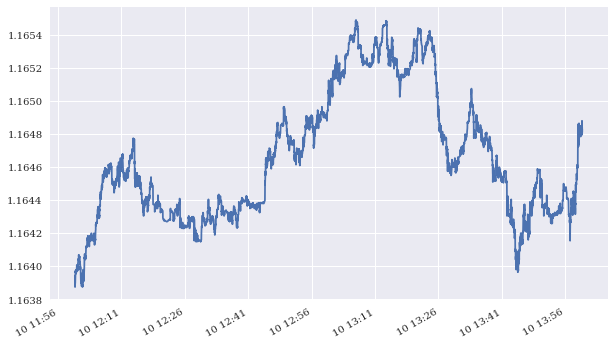

In [38]:
tick['Mid'].plot(figsize = (10, 6))

In [39]:
tick_resam = tick.resample(rule = '5min', label = 'right').last()

In [40]:
tick_resam.head()

,Bid,Ask,Mid
2017-11-10 12:05:00,1.16425,1.16427,1.164260
2017-11-10 12:10:00,1.16454,1.16455,1.164545
2017-11-10 12:15:00,1.16449,1.16449,1.164490
2017-11-10 12:20:00,1.16437,1.16437,1.164370
2017-11-10 12:25:00,1.16429,1.16430,1.164295


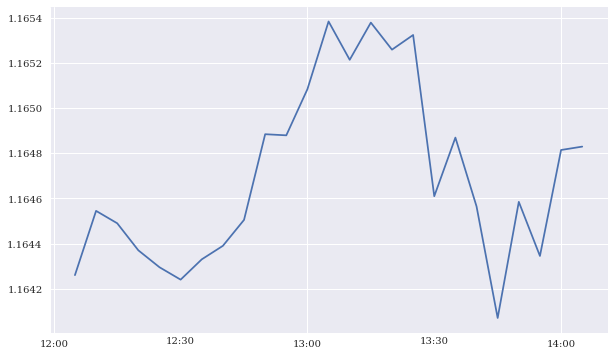

In [41]:
tick_resam['Mid'].plot(figsize = (10, 6))

# 練習  
某FGの2019年度の株価です.

In [85]:
practice = '8316smfg_2019.csv'
pdata = pd.read_csv(practice, index_col = 0, parse_dates = True)

In [86]:
pdata.head()

,opening,high,low,closing,volume,adjustment
Date,,,,,,
2019-01-04,3597,3667,3581,3662,7934900,3662
2019-01-07,3760,3789,3733,3761,8628400,3761
2019-01-08,3779,3820,3764,3782,6631700,3782
2019-01-09,3830,3836,3788,3813,4582300,3813
2019-01-10,3778,3830,3770,3819,4880700,3819


In [104]:
pdata_hl = pdata[['high', 'low']]

In [105]:
pdata_hl['mean'] = pdata_hl.mean(1)
pdata_hl.head()

/Users/norihito_kita/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,high,low,mean
Date,,,
2019-01-04,3667,3581,3624.0
2019-01-07,3789,3733,3761.0
2019-01-08,3820,3764,3792.0
2019-01-09,3836,3788,3812.0
2019-01-10,3830,3770,3800.0


In [110]:
pdata_hl['rolling_mean'] = pdata_hl['mean'].rolling(window = 15).mean()
pdata_hl['rolling_mean'].tail()

/Users/norihito_kita/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Date
2019-06-13    3793.466667
2019-06-14    3791.566667
2019-06-17    3787.100000
2019-06-18    3781.866667
2019-06-19    3781.400000
Name: rolling_mean, dtype: float64

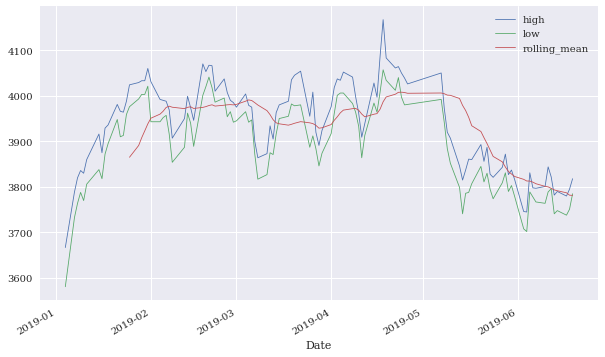

In [115]:
ax = pdata_hl[['high', 'low', 'rolling_mean']].plot(figsize = (10, 6), lw = 0.8)
plt.savefig("smfg2019.png")